In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../data/processed/df_listo_para_eda.csv',sep=';')
df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,...,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen,PIB Region Destino,Total Temporada Region,Total Temporada Provincia,Total Temporada Comuna
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,...,2019,1,enero,109,Alta,1061.580205,1061.580205,268129,76446,1276
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,...,2019,1,enero,298,Alta,1061.580205,1061.580205,268129,76446,5512
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,...,2019,1,enero,2594,Alta,1061.580205,1061.580205,268129,76446,22586
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,...,2019,1,enero,4138,Alta,1061.580205,1061.580205,268129,76446,21894
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,...,2019,1,enero,2071,Alta,1061.580205,3724.530431,500988,301193,187990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,...,2023,12,diciembre,17,Alta,833.567298,833.567298,790647,139183,19389
2952620,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,...,2023,12,diciembre,44,Alta,833.567298,833.567298,790647,139183,10967
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,...,2023,12,diciembre,108,Alta,833.567298,833.567298,790647,159556,23654
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,...,2023,12,diciembre,47,Alta,833.567298,833.567298,790647,159556,32388


In [14]:
# Verificación de filas duplicadas

print(f'Filas Duplicadas: {df.duplicated().sum()}')

Filas Duplicadas: 0


In [15]:
# Identificar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Columnas categóricas:", categorical_cols)
print("Columnas numéricas:", numerical_cols)
print("Cantidad de Columnas numéricas: ", len(numerical_cols))

Columnas categóricas: ['Comuna Origen', 'Provincia Origen', 'Region Origen', 'Comuna Destino', 'Destino Turistico', 'Provincia Destino', 'Region Destino', 'Mes', 'Temporada']
Columnas numéricas: ['CUT Comuna Origen', 'CUT Provincia Origen', 'CUT Region Origen', 'CUT Comuna Destino', 'CUT Provincia Destino', 'CUT Region Destino', 'Anio', 'CUT Mes', 'Viajes Ocasionales', 'PIB Region Origen', 'PIB Region Destino', 'Total Temporada Region', 'Total Temporada Provincia', 'Total Temporada Comuna']
Cantidad de Columnas numéricas:  14


In [ ]:
# Analisis Multivariante
    # Anlisis Numerico - numerico

fig, axis = plt.subplots(8,3,figsize=(10,16))

#Contrastamos las variables predictoras númericas con la variable objetivo

sns.regplot(ax=axis[0,0], data=df, x="Anio", y="Viajes Ocasionales")
sns.heatmap(df[["Viajes Ocasionales","Anio"]].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="CUT Mes", y="Viajes Ocasionales")
sns.heatmap(df[["Viajes Ocasionales",'CUT Mes']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[0,2], data=df, x="PIB Region Origen", y="Viajes Ocasionales")
sns.heatmap(df[["Viajes Ocasionales",'PIB Region Origen']].corr(),annot=True,fmt='.2f',ax=axis[1,2],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="PIB Region Destino", y="Viajes Ocasionales")
sns.heatmap(df[["Viajes Ocasionales",'PIB Region Destino']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

sns.regplot(ax=axis[2,1], data=df, x="Total Temporada Region", y="Viajes Ocasionales")
sns.heatmap(df[["Viajes Ocasionales",'Total Temporada Region']].corr(),annot=True,fmt='.2f',ax=axis[3,1],cbar=False)

sns.regplot(ax=axis[2,2], data=df, x="Total Temporada Provincia", y="Viajes Ocasionales")
sns.heatmap(df[["Viajes Ocasionales",'Total Temporada Provincia']].corr(),annot=True,fmt='.2f',ax=axis[3,2],cbar=False)

sns.regplot(ax=axis[3,0], data=df, x="Total Temporada Comuna", y="Viajes Ocasionales")
sns.heatmap(df[["Viajes Ocasionales","Total Temporada Comuna"]].corr(),annot=True,fmt='.2f',ax=axis[4,0],cbar=False)

sns.regplot(ax=axis[3,1], data=df, x="CUT Comuna Origen", y="Viajes Ocasionales")
sns.heatmap(df[["Viajes Ocasionales",'CUT Comuna Origen']].corr(),annot=True,fmt='.2f',ax=axis[4,1],cbar=False)

sns.regplot(ax=axis[3,2], data=df, x="CUT Provincia Origen", y="Viajes Ocasionales")
sns.heatmap(df[["Viajes Ocasionales",'CUT Provincia Origen']].corr(),annot=True,fmt='.2f',ax=axis[4,2],cbar=False)

sns.regplot(ax=axis[5,0], data=df, x="CUT Region Origen", y="Viajes Ocasionales")
sns.heatmap(df[["Total Temporada Comuna",'CUT Region Origen']].corr(),annot=True,fmt='.2f',ax=axis[6,0],cbar=False)

sns.regplot(ax=axis[5,1], data=df, x="CUT Comuna Destino", y="Viajes Ocasionales")
sns.heatmap(df[["Total Temporada Comuna",'CUT Comuna Destino']].corr(),annot=True,fmt='.2f',ax=axis[6,1],cbar=False)

sns.regplot(ax=axis[5,2], data=df, x="CUT Provincia Destino", y="Viajes Ocasionales")
sns.heatmap(df[["Total Temporada Comuna",'CUT Provincia Destino']].corr(),annot=True,fmt='.2f',ax=axis[6,2],cbar=False)

sns.regplot(ax=axis[7,0], data=df, x="CUT Region Destino", y="Viajes Ocasionales")
sns.heatmap(df[["Total Temporada Comuna",'CUT Region Destino']].corr(),annot=True,fmt='.2f',ax=axis[8,0],cbar=False)


plt.tight_layout()
plt.show()

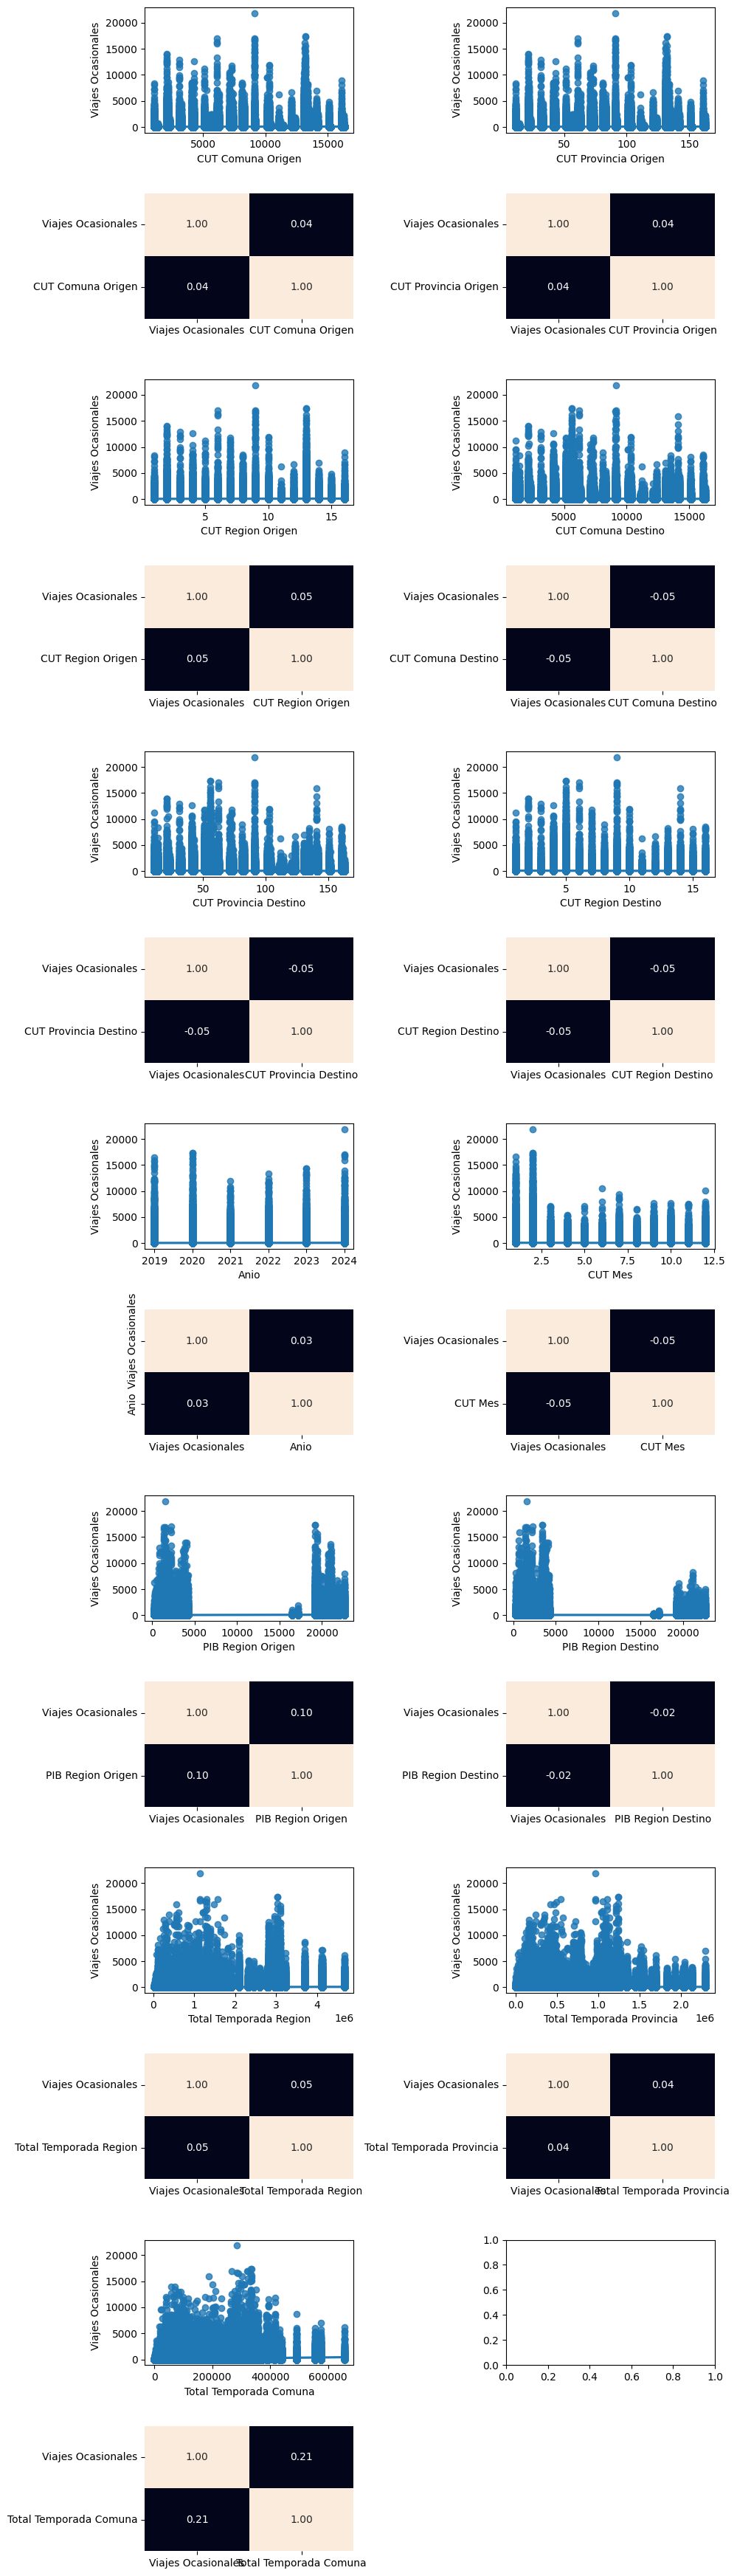

In [8]:
def plot_numerical_vs_target(df, target_var):
    # Verificar que el DataFrame contiene solo variables numéricas
    if not all(df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
        raise ValueError("El DataFrame debe contener solo variables numéricas.")

    # Verificar que la variable objetivo está en el DataFrame
    if target_var not in df.columns:
        raise ValueError(f"La variable objetivo '{target_var}' no se encuentra en el DataFrame.")

    # Obtener las variables numéricas excepto la variable objetivo
    num_vars = df.select_dtypes(include='number').columns
    num_vars = num_vars[num_vars != target_var]  # Excluir la variable objetivo

    # Calcular el número de filas necesarias para el subplot
    n_vars = len(num_vars)
    n_rows = (n_vars + 1) // 2  # Redondear hacia arriba para obtener suficientes filas

    # Crear la figura y los ejes
    fig, axis = plt.subplots(n_rows * 2, 2, figsize=(10, n_rows * 5))

    # Iterar sobre cada variable numérica y crear gráficos
    for i, var in enumerate(num_vars):
        row = i // 2 * 2  # Fila para regplot
        col = i % 2  # Columna para regplot

        # Graficar regplots
        sns.regplot(ax=axis[row, col], data=df, x=var, y=target_var)
        # Graficar heatmap
        sns.heatmap(df[[target_var, var]].corr(), annot=True, fmt='.2f', ax=axis[row + 1, col], cbar=False)

    # Eliminar ejes vacíos si hay un número impar de variables
    if n_vars % 2 != 0:
        fig.delaxes(axis[n_rows * 2 - 1, 1])

    # Ajustar el layout para evitar solapamiento
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# plot_numerical_vs_target(df, 'charges')

plot_numerical_vs_target(df[numerical_cols], 'Viajes Ocasionales')